# Mobile Price Classification

Bob, the founder of a new mobile company, is aiming to compete with established giants like Apple and Samsung in the mobile phone market. However, to make informed decisions about pricing, he needs to understand the relationship between various features of a mobile phone (such as RAM, internal memory, etc.) and its selling price. This is where machine learning comes in.

In this notebook, we will assist Bob in solving his problem by building a machine learning model that can classify mobile phones into different price ranges based on their features. Instead of predicting the actual price, we'll focus on categorizing the phones into price tiers, indicating how high the price is relative to others.

You can find the Kaggle problem: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

What we're going to cover:

1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Conclusion
8. Predict test data and save predictions

## 1. Getting the data ready

In [1]:
import pandas as pd
import numpy as np

mobile_price_data = pd.read_csv("./data/train.csv")
mobile_price_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
# Total number of rows
len(mobile_price_data)

2000

In [3]:
mobile_price_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

### 1a. Drop N/A columns

In [4]:
# Identify Column With N/A values
mobile_price_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### 1b. Shuffle Data

In [5]:
mobile_price_data = mobile_price_data.sample(frac=1, random_state=42)

### 1c. Check for Duplicate

In [6]:
duplicates = mobile_price_data[mobile_price_data.duplicated()]
duplicates

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


### 1d. Split Data into X/y

In [7]:
X = mobile_price_data.drop("price_range", axis=1)
y = mobile_price_data["price_range"]

## 2. choosing the right estimator/algorithm for your problem
Using:https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html as a roadmap to picking a model, Our options are:
- Linear SVC
- KNeighbors Classifier
- Ensemble Classifier


## 3. Fit the model/algorithm and use it to make predictions on our data

##### 3a. In this step, we split the data into training and testing sets, allocating 80% for training and 20% for testing.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 3b. Linear SVC

In [9]:
from sklearn.svm import LinearSVC

#set up random seed
np.random.seed(42)
linear_svc_clf = LinearSVC(max_iter=10000, dual='auto')
linear_svc_clf.fit(X_train, y_train)

# Evaluate LinearSVC
linear_svc_clf.score(X_test, y_test)

0.7875

In [10]:
np.random.seed(42)
highest_score = 0
optimal_max_iter = 0
for i in range(10, 100, 1):
    print(f"Trying LinearSVC with {i} max_iter")
    linear_svc_clf = LinearSVC(max_iter=i, dual='auto')
    linear_svc_clf.fit(X_train, y_train)
    score = linear_svc_clf.score(X_test, y_test)
    print(f" Model accuracy on test set: {score*100:.2f}%")
    
    if score > highest_score:
        highest_score = score
        optimal_max_iter = i
    
    print("")
    
print("highest score is:", highest_score, " at optimal_max_iter:", optimal_max_iter)

Trying LinearSVC with 10 max_iter
 Model accuracy on test set: 67.25%

Trying LinearSVC with 11 max_iter
 Model accuracy on test set: 68.00%

Trying LinearSVC with 12 max_iter
 Model accuracy on test set: 68.50%

Trying LinearSVC with 13 max_iter
 Model accuracy on test set: 66.00%

Trying LinearSVC with 14 max_iter
 Model accuracy on test set: 67.25%

Trying LinearSVC with 15 max_iter
 Model accuracy on test set: 67.50%

Trying LinearSVC with 16 max_iter
 Model accuracy on test set: 67.75%

Trying LinearSVC with 17 max_iter
 Model accuracy on test set: 67.25%

Trying LinearSVC with 18 max_iter
 Model accuracy on test set: 67.00%

Trying LinearSVC with 19 max_iter
 Model accuracy on test set: 68.50%

Trying LinearSVC with 20 max_iter
 Model accuracy on test set: 68.25%

Trying LinearSVC with 21 max_iter


/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: Conv

 Model accuracy on test set: 69.50%

Trying LinearSVC with 22 max_iter
 Model accuracy on test set: 69.75%

Trying LinearSVC with 23 max_iter
 Model accuracy on test set: 70.00%

Trying LinearSVC with 24 max_iter
 Model accuracy on test set: 70.00%

Trying LinearSVC with 25 max_iter
 Model accuracy on test set: 70.00%

Trying LinearSVC with 26 max_iter
 Model accuracy on test set: 70.00%

Trying LinearSVC with 27 max_iter
 Model accuracy on test set: 72.50%

Trying LinearSVC with 28 max_iter
 Model accuracy on test set: 71.75%

Trying LinearSVC with 29 max_iter


/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: Conv

 Model accuracy on test set: 71.50%

Trying LinearSVC with 30 max_iter
 Model accuracy on test set: 72.75%

Trying LinearSVC with 31 max_iter
 Model accuracy on test set: 72.75%

Trying LinearSVC with 32 max_iter
 Model accuracy on test set: 72.50%

Trying LinearSVC with 33 max_iter
 Model accuracy on test set: 72.50%

Trying LinearSVC with 34 max_iter
 Model accuracy on test set: 73.75%

Trying LinearSVC with 35 max_iter
 Model accuracy on test set: 73.50%

Trying LinearSVC with 36 max_iter


/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: Conv

 Model accuracy on test set: 74.50%

Trying LinearSVC with 37 max_iter
 Model accuracy on test set: 74.75%

Trying LinearSVC with 38 max_iter
 Model accuracy on test set: 74.75%

Trying LinearSVC with 39 max_iter
 Model accuracy on test set: 76.00%

Trying LinearSVC with 40 max_iter
 Model accuracy on test set: 76.25%

Trying LinearSVC with 41 max_iter
 Model accuracy on test set: 75.75%

Trying LinearSVC with 42 max_iter


/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: Conv

 Model accuracy on test set: 76.50%

Trying LinearSVC with 43 max_iter
 Model accuracy on test set: 76.50%

Trying LinearSVC with 44 max_iter
 Model accuracy on test set: 76.50%

Trying LinearSVC with 45 max_iter
 Model accuracy on test set: 76.75%

Trying LinearSVC with 46 max_iter
 Model accuracy on test set: 76.50%

Trying LinearSVC with 47 max_iter
 Model accuracy on test set: 77.50%

Trying LinearSVC with 48 max_iter


/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Model accuracy on test set: 77.50%

Trying LinearSVC with 49 max_iter
 Model accuracy on test set: 77.50%

Trying LinearSVC with 50 max_iter
 Model accuracy on test set: 77.00%

Trying LinearSVC with 51 max_iter
 Model accuracy on test set: 77.00%

Trying LinearSVC with 52 max_iter
 Model accuracy on test set: 77.25%

Trying LinearSVC with 53 max_iter


/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Model accuracy on test set: 79.00%

Trying LinearSVC with 54 max_iter
 Model accuracy on test set: 79.00%

Trying LinearSVC with 55 max_iter
 Model accuracy on test set: 79.00%

Trying LinearSVC with 56 max_iter
 Model accuracy on test set: 79.00%

Trying LinearSVC with 57 max_iter
 Model accuracy on test set: 78.75%

Trying LinearSVC with 58 max_iter
 Model accuracy on test set: 78.75%

Trying LinearSVC with 59 max_iter
 Model accuracy on test set: 78.75%

Trying LinearSVC with 60 max_iter
 Model accuracy on test set: 78.75%

Trying LinearSVC with 61 max_iter
 Model accuracy on test set: 78.75%

Trying LinearSVC with 62 max_iter
 Model accuracy on test set: 78.75%

Trying LinearSVC with 63 max_iter
 Model accuracy on test set: 78.75%

Trying LinearSVC with 64 max_iter
 Model accuracy on test set: 78.75%

Trying LinearSVC with 65 max_iter
 Model accuracy on test set: 78.75%

Trying LinearSVC with 66 max_iter
 Model accuracy on test set: 78.75%

Trying LinearSVC with 67 max_iter
 Model

In [11]:
#set up random seed
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
final_linear_svc_clf = LinearSVC(max_iter=60, dual='auto')
final_linear_svc_clf.fit(X_train, y_train)

# Evaluate LinearSVC
final_linear_svc_clf.score(X_test, y_test)

0.7875

#### 3b. KNeighbors Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=100)
knn_classifier.fit(X_train.values, y_train.values)
knn_classifier.score(X_test.values, y_test.values)


0.89

In [14]:
np.random.seed(42)
highest_score = 0
most_optimal_n_neighbors = 0
for i in range(1, 100, 1):
    print(f"Trying KNeighborsClassifier with {i} n_neighbors")
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train.values, y_train.values)
    score = knn_classifier.score(X_test.values, y_test.values)
    print(f" Model accuracy on test set: {score*100:.2f}%")
    if score > highest_score:
        highest_score = score
        most_optimal_n_neighbors = i

    
    print("")
print("highest score is:", highest_score, " at n_neighbors:", most_optimal_n_neighbors)

Trying KNeighborsClassifier with 1 n_neighbors
 Model accuracy on test set: 90.25%

Trying KNeighborsClassifier with 2 n_neighbors
 Model accuracy on test set: 89.50%

Trying KNeighborsClassifier with 3 n_neighbors
 Model accuracy on test set: 90.75%

Trying KNeighborsClassifier with 4 n_neighbors
 Model accuracy on test set: 91.50%

Trying KNeighborsClassifier with 5 n_neighbors
 Model accuracy on test set: 92.00%

Trying KNeighborsClassifier with 6 n_neighbors
 Model accuracy on test set: 91.75%

Trying KNeighborsClassifier with 7 n_neighbors
 Model accuracy on test set: 92.00%

Trying KNeighborsClassifier with 8 n_neighbors
 Model accuracy on test set: 91.50%

Trying KNeighborsClassifier with 9 n_neighbors
 Model accuracy on test set: 92.50%

Trying KNeighborsClassifier with 10 n_neighbors
 Model accuracy on test set: 92.25%

Trying KNeighborsClassifier with 11 n_neighbors
 Model accuracy on test set: 93.00%

Trying KNeighborsClassifier with 12 n_neighbors
 Model accuracy on test se

In [15]:
np.random.seed(42)
final_knn_classifier = KNeighborsClassifier(n_neighbors=11)
final_knn_classifier.fit(X_train.values, y_train.values)
final_knn_classifier.score(X_test.values, y_test.values)

0.93

#### 3c. Ensemble Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

random_forest_classifier_model =  RandomForestClassifier(n_estimators=100)
random_forest_classifier_model.fit(X_train, y_train)

# Check score of model
random_forest_classifier_model.score(X_test, y_test)

0.8825

In [18]:
np.random.seed(42)
highest_score = 0
optimal_n_estimators = 0
for i in range(1, 100, 1):
    print(f"Trying RandomForestClassifier with {i} n_estimators")
    random_forest_classifier_model = RandomForestClassifier(n_estimators=i)
    random_forest_classifier_model.fit(X_train, y_train)
    score = random_forest_classifier_model.score(X_test, y_test)
    print(f" Model accuracy on test set: {score*100:.2f}%")
    if score > highest_score:
        highest_score = score
        optimal_n_estimators=i
    
    print("")
print("highest score is:", highest_score, "at n_estimators:", optimal_n_estimators)

Trying RandomForestClassifier with 1 n_estimators
 Model accuracy on test set: 66.75%

Trying RandomForestClassifier with 2 n_estimators
 Model accuracy on test set: 53.00%

Trying RandomForestClassifier with 3 n_estimators
 Model accuracy on test set: 61.00%

Trying RandomForestClassifier with 4 n_estimators
 Model accuracy on test set: 65.50%

Trying RandomForestClassifier with 5 n_estimators
 Model accuracy on test set: 72.75%

Trying RandomForestClassifier with 6 n_estimators
 Model accuracy on test set: 75.25%

Trying RandomForestClassifier with 7 n_estimators
 Model accuracy on test set: 77.00%

Trying RandomForestClassifier with 8 n_estimators
 Model accuracy on test set: 76.50%

Trying RandomForestClassifier with 9 n_estimators
 Model accuracy on test set: 78.75%

Trying RandomForestClassifier with 10 n_estimators
 Model accuracy on test set: 79.50%

Trying RandomForestClassifier with 11 n_estimators
 Model accuracy on test set: 81.50%

Trying RandomForestClassifier with 12 n_e

In [23]:
np.random.seed(42)

final_random_forest_classifier_model =  RandomForestClassifier(n_estimators=98)
final_random_forest_classifier_model.fit(X_train, y_train)
final_random_forest_classifier_model.score(X_test, y_test)

0.88

#### Model Ranking Based on Score

1. `final_knn_classifier`: 0.93
2. `final_random_forest_classifier_model`: 0.88
3. `final_linear_svc_clf`: 0.7875


## 4. Evaluating a model


#### 4.1 Make predictions

In [26]:
y_preds_final_random_forest_classifier_model =final_random_forest_classifier_model.predict(X_test)
np.mean(y_preds_final_random_forest_classifier_model == y_test)

0.88

In [27]:
y_preds_final_linear_svc_clf = final_linear_svc_clf.predict(X_test)
np.mean(y_preds_final_linear_svc_clf == y_test)

0.7875

In [28]:
y_preds_final_knn_classifier = final_knn_classifier.predict(X_test.values)
np.mean(y_preds_final_knn_classifier == y_test)

0.93

#### Model Ranking Based on Score

1. `final_knn_classifier`: 0.93
2. `final_random_forest_classifier_model`: 0.88
3. `final_linear_svc_clf`: 0.7875


#### 4.2 Make cross evaluation

In [30]:
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
np.random.seed(42)
cross_value_score_for_final_random_forest_classifier_model = cross_val_score(final_random_forest_classifier_model, X, y, scoring='accuracy')
np.mean(cross_value_score_for_final_random_forest_classifier_model)

0.8755

In [35]:
warnings.filterwarnings('ignore')
np.random.seed(42)

cross_value_score_for_final_linear_svc_clf = cross_val_score(final_linear_svc_clf, X, y, scoring='accuracy')
np.mean(cross_value_score_for_final_linear_svc_clf)

0.804

In [36]:
warnings.filterwarnings('ignore')
np.random.seed(42)

cross_value_score_for_final_knn_classifier = cross_val_score(final_knn_classifier, X.values, y.values, scoring='accuracy')
np.mean(cross_value_score_for_final_knn_classifier)

0.9385

#### Model Ranking Based on Score

1. `final_knn_classifier`: 0.9385
2. `final_random_forest_classifier_model`: 0.8755
3. `final_linear_svc_clf`: 0.804


#### 4.3 Confusion Matrix

**random_forest_classifier_model**

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds_final_random_forest_classifier_model)
pd.crosstab(y_test, y_preds_final_random_forest_classifier_model, rownames=["Actual Label"],
            colnames=["predicted Labels"]
           )

predicted Labels,0,1,2,3
Actual Label,,,,
0,104,6,0,0
1,4,65,12,0
2,0,8,72,10
3,0,0,8,111


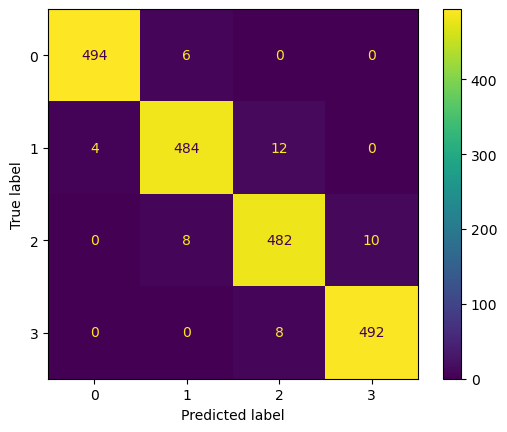

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=final_random_forest_classifier_model, X=X, y=y)

**linear_svc_clf**

In [41]:
confusion_matrix(y_test, y_preds_final_linear_svc_clf)
pd.crosstab(y_test, y_preds_final_linear_svc_clf, rownames=["Actual Label"],
            colnames=["predicted Labels"]
           )

predicted Labels,0,1,2,3
Actual Label,,,,
0,105,5,0,0
1,10,47,24,0
2,0,24,44,22
3,0,0,0,119


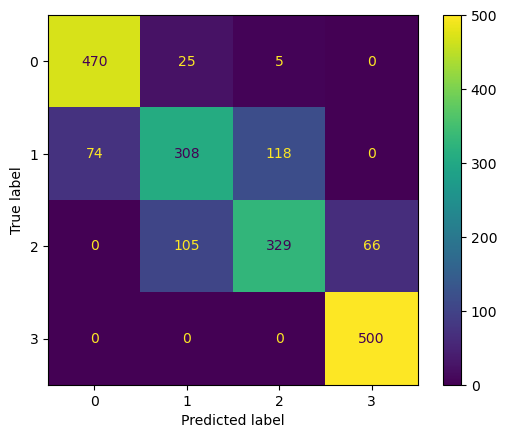

In [43]:
ConfusionMatrixDisplay.from_estimator(estimator=final_linear_svc_clf, X=X, y=y)

**knn_classifier**

In [44]:
confusion_matrix(y_test, y_preds_final_knn_classifier)
pd.crosstab(y_test, y_preds_final_knn_classifier, rownames=["Actual Label"],
            colnames=["predicted Labels"]
           )

predicted Labels,0,1,2,3
Actual Label,,,,
0,108,2,0,0
1,1,73,7,0
2,0,5,81,4
3,0,0,9,110


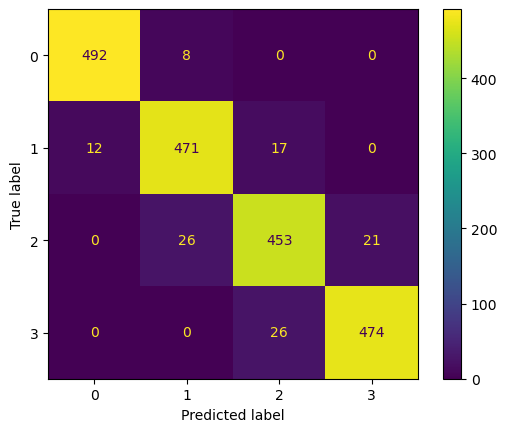

In [45]:
ConfusionMatrixDisplay.from_estimator(estimator=final_knn_classifier, X=X.values, y=y.values)

#### Model Ranking Based on Confusion Matrix


1. `final_knn_classifier`
2. `final_random_forest_classifier_model`
3. `final_linear_svc_clf`

#### 4.4 Classification Report


In [47]:
from sklearn.metrics import classification_report

**linear_svc_clf**

In [48]:
print(classification_report(y_test, y_preds_final_linear_svc_clf))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       110
           1       0.62      0.58      0.60        81
           2       0.65      0.49      0.56        90
           3       0.84      1.00      0.92       119

    accuracy                           0.79       400
   macro avg       0.76      0.76      0.75       400
weighted avg       0.77      0.79      0.78       400



**knn_classifier**

In [49]:
print(classification_report(y_test, y_preds_final_knn_classifier))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.91      0.90      0.91        81
           2       0.84      0.90      0.87        90
           3       0.96      0.92      0.94       119

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



**random_forest_classifier_model**

In [52]:
print(classification_report(y_test, y_preds_final_random_forest_classifier_model))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       110
           1       0.82      0.80      0.81        81
           2       0.78      0.80      0.79        90
           3       0.92      0.93      0.93       119

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



## 6. Save and load a trained model

**random_forest_classifier_model**

In [55]:
import pickle
pickle.dump(final_random_forest_classifier_model, open("./models/final_random_forest_classifier_model.pkl", "wb"))

**linear_svc_clf**

In [56]:
pickle.dump(final_linear_svc_clf, open("./models/final_linear_svc_clf_model.pkl", "wb"))

**knn_classifier**

In [57]:
pickle.dump(final_knn_classifier, open("./models/final_knn_classifier_model.pkl", "wb"))

# 7. Conclusion

In the evaluation of our models, the k-nearest neighbors (KNN) classifier demonstrated the highest performance, followed by the random forest classifier and linear support vector classifier (LinearSVC).

# 8. Predict test data and save predictions

In [83]:
mobile_price_test_data = pd.read_csv("./data/test.csv")
mobile_price_test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [84]:
len(mobile_price_test_data)

1000

In [85]:
mobile_price_test_data.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [86]:
mobile_price_test_data.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [87]:
duplicates = mobile_price_data[mobile_price_data.duplicated()]
duplicates

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [88]:
loaded_final_knn_classifier_model = pickle.load(open("./models/final_knn_classifier_model.pkl", "rb"))
loaded_final_knn_classifier_model.score(X_test.values, y_test.values)

0.93

In [89]:
import copy
mobile_price_test_data_X = mobile_price_test_data.drop("id", axis=1)
mobile_price_test_data_prediction = copy.deepcopy(mobile_price_test_data_X)
mobile_price_test_data_prediction['price_range'] = loaded_final_knn_classifier_model.predict(mobile_price_test_data_X.values)
mobile_price_test_data_prediction.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [90]:
mobile_price_test_data_prediction.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
999,1270,1,0.5,0,4,1,35,0.1,140,6,...,457,608,2828,9,2,3,1,0,1,2


In [91]:
len(mobile_price_test_data_prediction)


1000

In [92]:

mobile_price_test_data_prediction.to_csv('./data/mobile_price_test_data_prediction.csv', index=False)
